In [325]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'
plt.rc('font',family='Malgun Gothic') #윈도우즈(X축)
plt.rc('axes',unicode_minus=False) # Y축
import warnings
warnings.filterwarnings(action='ignore')

# 1. 데이터 로드

In [3]:
# df_last
df_last = pd.read_csv('data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210215.csv',encoding="CP949")
df_last

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
5435,제주,모든면적,2021,1,5199
5436,제주,전용면적 60㎡이하,2021,1,4686
5437,제주,전용면적 60㎡초과 85㎡이하,2021,1,5203
5438,제주,전용면적 85㎡초과 102㎡이하,2021,1,NaN


# 2. df_last 결측치 확인 및 처리

In [3]:
# 결측치 확인
df_last.isna().sum()
# 분양가격에 430개

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    430
dtype: int64

# 3. 평당분양가격 컬럼추가

In [4]:
# 형변환
df_last['분양가격(㎡)'] = pd.to_numeric(df_last['분양가격(㎡)'],errors='coerce')

In [5]:
df_last['평당분양가격'] = df_last['분양가격(㎡)']*3.3

In [6]:
df_last

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7
...,...,...,...,...,...,...
5435,제주,모든면적,2021,1,5199.0,17156.7
5436,제주,전용면적 60㎡이하,2021,1,4686.0,15463.8
5437,제주,전용면적 60㎡초과 85㎡이하,2021,1,5203.0,17169.9
5438,제주,전용면적 85㎡초과 102㎡이하,2021,1,NaN,NaN


# 4. 전용면적 컬럼 추가 

In [7]:
# 규모구분 컬럼 사용해서 전용면적 컬럼 만들기
df_di = df_last['규모구분'].copy()

In [8]:
df_di.iloc[1::5] = '60㎡'
df_di.iloc[2::5] = '60㎡~85㎡'
df_di.iloc[3::5] = '85㎡~102㎡'
df_di.iloc[4::5] = '102㎡~'

In [9]:
# df_last에 전용면적 컬럼 추가
df_last['전용면적'] = df_di

In [10]:
df_last.loc[:,['규모구분','전용면적']]

,규모구분,전용면적
0,모든면적,모든면적
1,전용면적 60㎡이하,60㎡
2,전용면적 60㎡초과 85㎡이하,60㎡~85㎡
3,전용면적 85㎡초과 102㎡이하,85㎡~102㎡
4,전용면적 102㎡초과,102㎡~
...,...,...
5435,모든면적,모든면적
5436,전용면적 60㎡이하,60㎡
5437,전용면적 60㎡초과 85㎡이하,60㎡~85㎡
5438,전용면적 85㎡초과 102㎡이하,85㎡~102㎡


# 5. 사용하지 않는 컬럼제거 및 메모리 사용량

In [11]:
#컬럼제거 전 
# 297.6kb 사용
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      5440 non-null   object 
 1   규모구분     5440 non-null   object 
 2   연도       5440 non-null   int64  
 3   월        5440 non-null   int64  
 4   분양가격(㎡)  4918 non-null   float64
 5   평당분양가격   4918 non-null   float64
 6   전용면적     5440 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 297.6+ KB


In [12]:
#컬럼제거
df_last = df_last.drop(['규모구분','분양가격(㎡)'], axis=1 ) 

In [13]:
#컬럼제거 후
df_last.info()
#212.6kb 사용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     5440 non-null   object 
 1   연도      5440 non-null   int64  
 2   월       5440 non-null   int64  
 3   평당분양가격  4918 non-null   float64
 4   전용면적    5440 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 212.6+ KB


# 6.GroupBy vs pivot_table

In [14]:
#1 지역별 데이터 수 
# Groupby
df_last.groupby(df_last.지역명).count()

,연도,월,평당분양가격,전용면적
지역명,,,,
강원,320,320,303,320
경기,320,320,315,320
경남,320,320,306,320
경북,320,320,294,320
광주,320,320,262,320
대구,320,320,307,320
대전,320,320,239,320
부산,320,320,315,320
서울,320,320,315,320


In [15]:
#1 지역별 데이터 수 
# pivot_table
df_last.pivot_table(index='지역명',aggfunc='count')

,연도,월,전용면적,평당분양가격
지역명,,,,
강원,320,320,320,303
경기,320,320,320,315
경남,320,320,320,306
경북,320,320,320,294
광주,320,320,320,262
대구,320,320,320,307
대전,320,320,320,239
부산,320,320,320,315
서울,320,320,320,315


In [16]:
#2 지역별 평당분양가격(평균)
# Groupby
df_last.groupby(df_last.지역명)['평당분양가격'].mean()

지역명
강원     8390.571287
경기    13713.354286
경남     9589.627451
경북     8690.617347
광주    10756.677481
대구    12691.950489
대전    10412.425105
부산    12351.711429
서울    24867.846667
세종     9975.354231
울산    10736.290355
인천    12566.219614
전남     7961.468932
전북     7896.046006
제주    11743.878161
충남     8414.014430
충북     7786.956230
Name: 평당분양가격, dtype: float64

In [17]:
#2 지역별 평당분양가격(평균)
# pivot_table
df_last.pivot_table(index='지역명',values='평당분양가격')

,평당분양가격
지역명,
강원,8390.571287
경기,13713.354286
경남,9589.627451
경북,8690.617347
광주,10756.677481
대구,12691.950489
대전,10412.425105
부산,12351.711429
서울,24867.846667


In [18]:
#3 전용면적별 평당분양가격(평균)
# Groupby
df_last.groupby(df_last.전용면적)['평당분양가격'].mean()

전용면적
102㎡~       11987.947280
60㎡         10802.735170
60㎡~85㎡     10694.895726
85㎡~102㎡    11733.047719
모든면적        10702.628125
Name: 평당분양가격, dtype: float64

In [19]:
#3 전용면적별 평당분양가격(평균)
# pivot_table
df_last.pivot_table(index='전용면적',values='평당분양가격')

,평당분양가격
전용면적,
102㎡~,11987.947280
60㎡,10802.735170
60㎡~85㎡,10694.895726
85㎡~102㎡,11733.047719
모든면적,10702.628125


In [20]:
#4 지역별,전용면적별 평당분양가격(평균)
# Groupby
df_last.groupby([df_last.지역명,df_last.전용면적])['평당분양가격'].mean()

지역명  전용면적    
강원   102㎡~       9367.547619
     60㎡         8054.357143
     60㎡~85㎡     7854.523810
     85㎡~102㎡    8896.476471
     모든면적        7876.314286
                    ...     
충북   102㎡~       8383.466667
     60㎡         7294.152381
     60㎡~85㎡     7416.619048
     85㎡~102㎡    8481.757377
     모든면적        7380.842857
Name: 평당분양가격, Length: 85, dtype: float64

In [21]:
#4 지역별,전용면적별 평당분양가격(평균)
# pivot_table
df_last.pivot_table(index=['지역명','전용면적'],values='평당분양가격')

평당분양가격
지역명 전용면적                 
강원  102㎡~     9367.547619
    60㎡       8054.357143
    60㎡~85㎡   7854.523810
    85㎡~102㎡  8896.476471
    모든면적      7876.314286
...                   ...
충북  102㎡~     8383.466667
    60㎡       7294.152381
    60㎡~85㎡   7416.619048
    85㎡~102㎡  8481.757377
    모든면적      7380.842857

[85 rows x 1 columns]

In [22]:
#5 연도, 지역별 평당 분양가격 
#groupby
df_last.groupby([df_last.연도,df_last.지역명])['평당분양가격'].mean()

연도    지역명
2015  강원      7188.06
      경기     11060.94
      경남      8459.22
      경북      7464.16
      광주      7916.70
               ...   
2021  전남      9680.22
      전북      8457.24
      제주     16596.80
      충남      9216.90
      충북      8766.78
Name: 평당분양가격, Length: 119, dtype: float64

In [23]:
#5 연도, 지역별 평당 분양가격 
#pivot_table
df_last.pivot_table(index=['연도','지역명'],values='평당분양가격')

평당분양가격
연도   지역명          
2015 강원    7188.06
     경기   11060.94
     경남    8459.22
     경북    7464.16
     광주    7916.70
...            ...
2021 전남    9680.22
     전북    8457.24
     제주   16596.80
     충남    9216.90
     충북    8766.78

[119 rows x 1 columns]

# 7. 선그래프와 막대 그래프로 시각화(matplotlib)

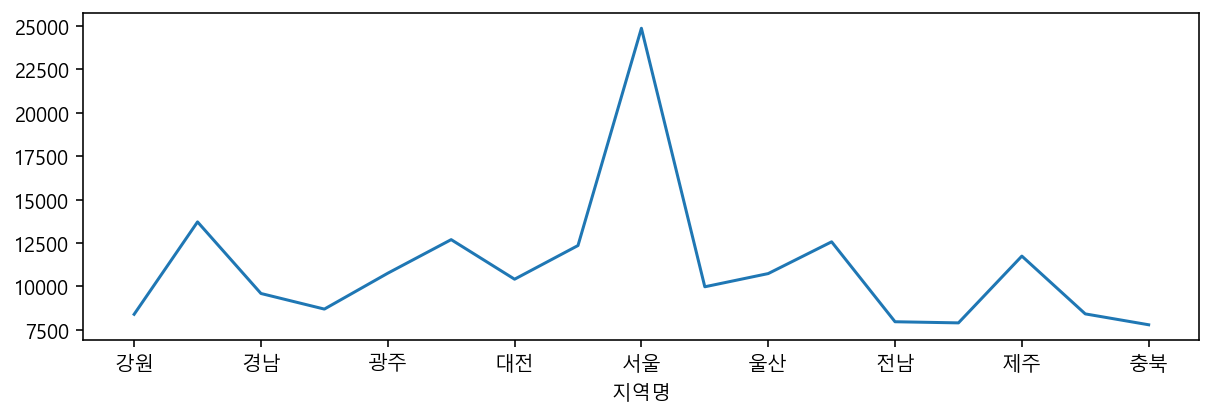

In [83]:
# 1. 지역별 평당분양가격 선 그래프
df_last.pivot_table(index='지역명',values='평당분양가격').plot(figsize=(10,3))
plt.gca().get_legend().remove()
plt.show()

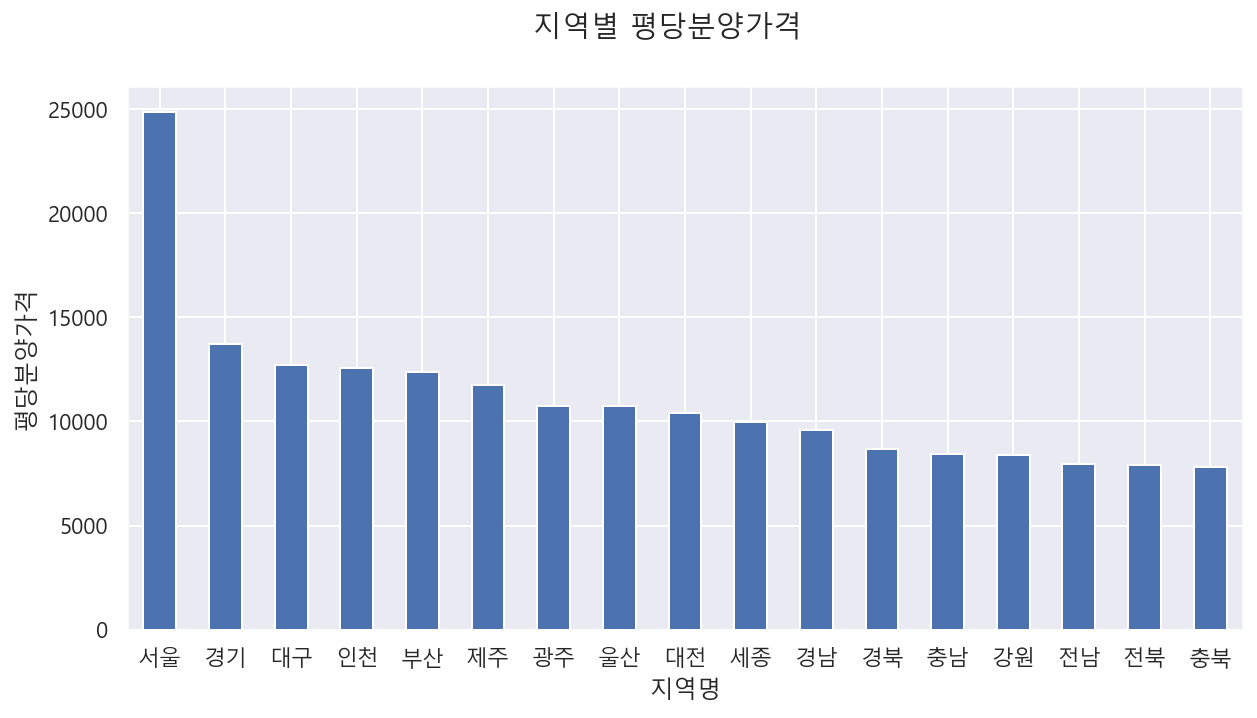

In [440]:
#2. 지역별 평당분양가격 바 그래프
sort_df = df_last.pivot_table(index='지역명',values='평당분양가격').sort_values(by='평당분양가격',ascending=False)
sort_df.plot.bar(figsize=(10,5),ylabel='평당분양가격')
plt.suptitle('지역별 평당분양가격')
plt.gca().get_legend().remove()
plt.xticks(rotation=0)
plt.show()

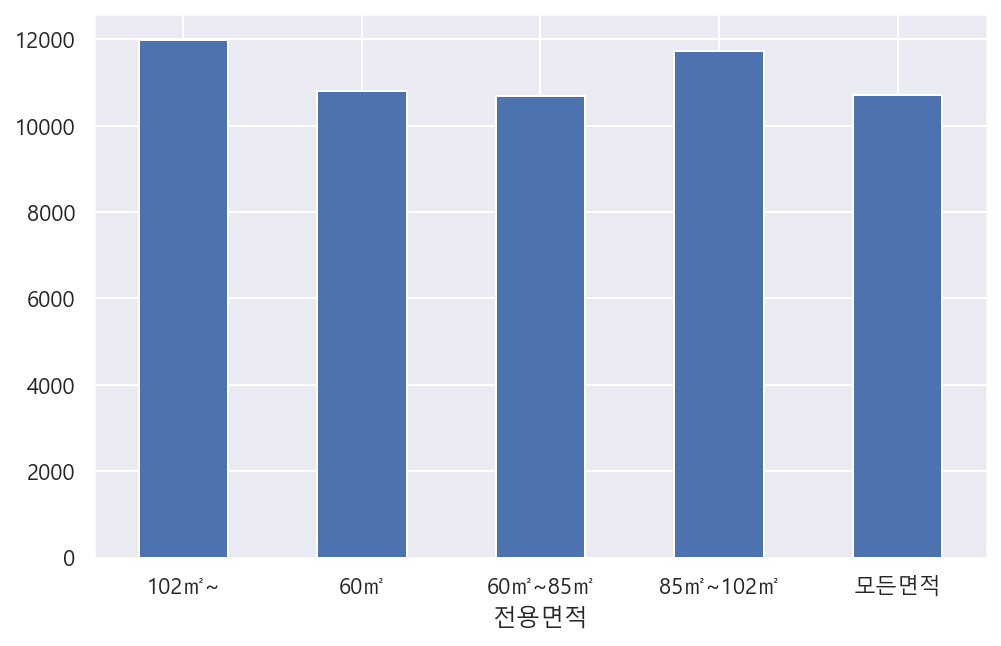

In [441]:
#3. 전용면적당 평당분양가격
df_last.pivot_table(index='전용면적',values='평당분양가격').plot.bar(figsize=(8,5))
plt.gca().get_legend().remove()
plt.xticks(rotation=0)
plt.show()

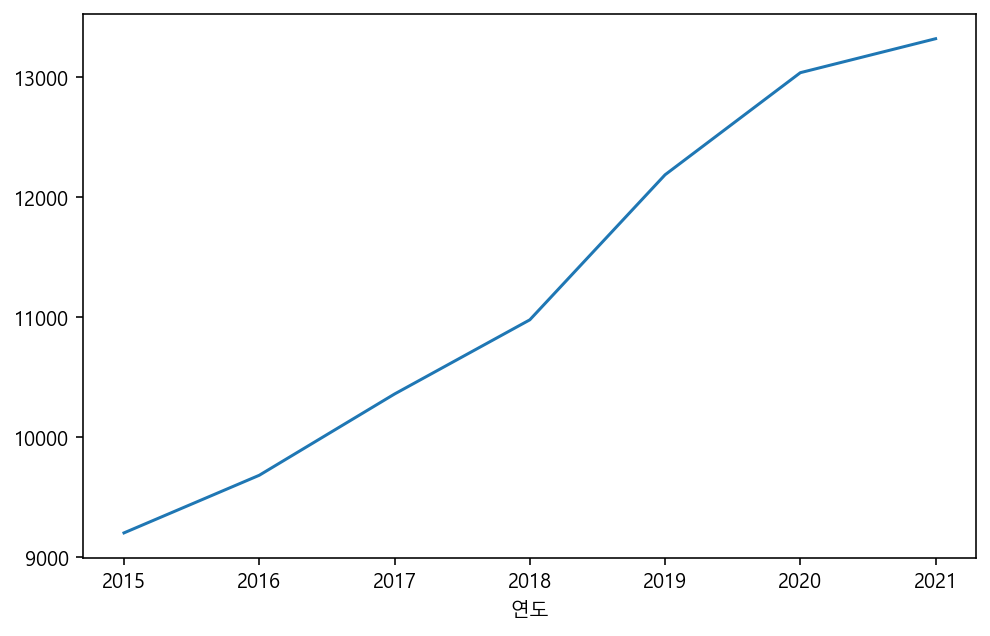

In [71]:
# 4.연도별 평당분양가격
df_last.groupby('연도')['평당분양가격'].mean().plot(figsize=(8,5))
plt.show()

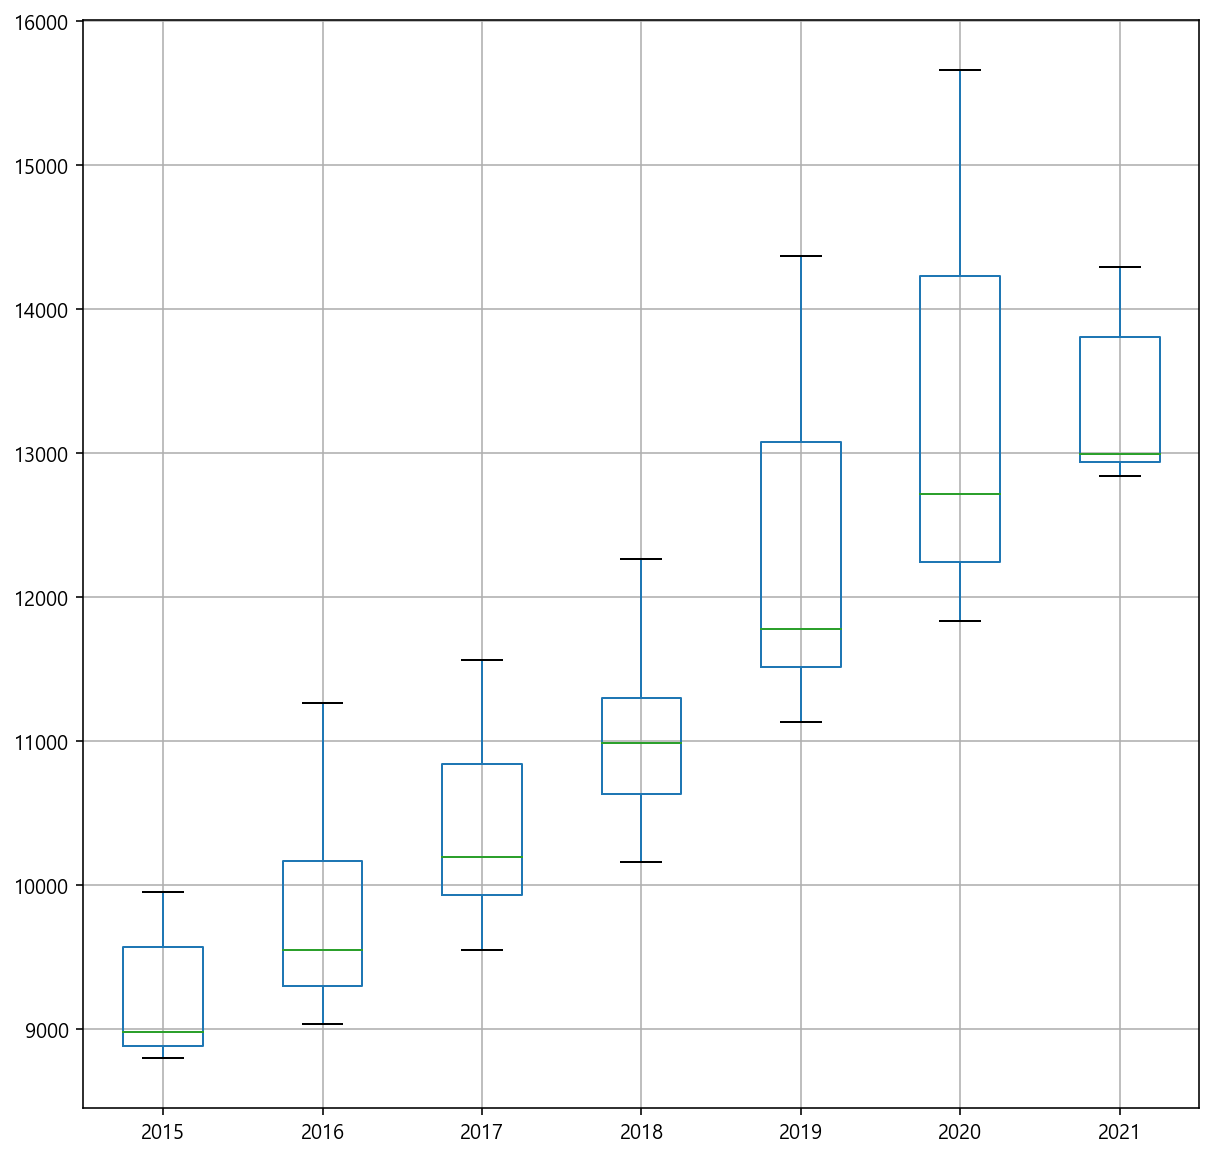

In [159]:
#연도별,전용면적별 box플롯
df_last.pivot_table(index=['전용면적','월'],columns=['연도'],values='평당분양가격').boxplot(figsize=(10,10))
plt.show()

# 8. 선그래프와 막대 그래프로 시각화(seaborn)

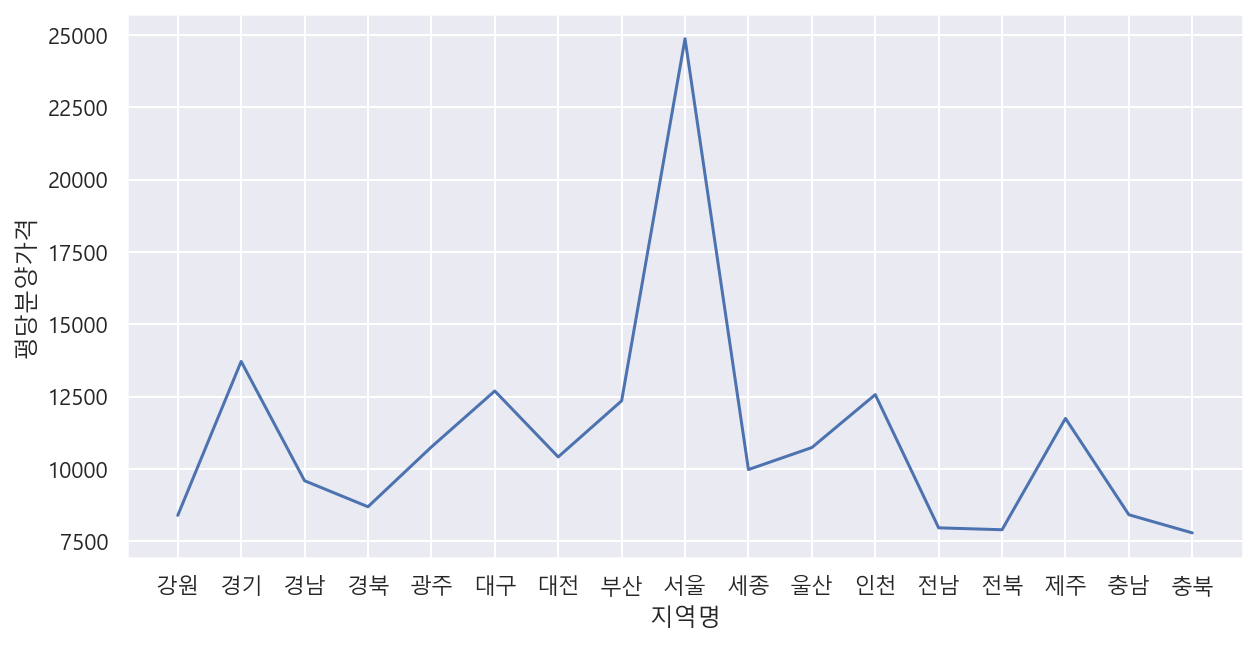

In [331]:
# 1. 지역별 평당분양가격 선 그래프
df_1=df_last.pivot_table(index='지역명',values='평당분양가격')
plt.figure(figsize=(10,5))
sns.lineplot(x='지역명',y='평당분양가격',data=df_1)
plt.show()

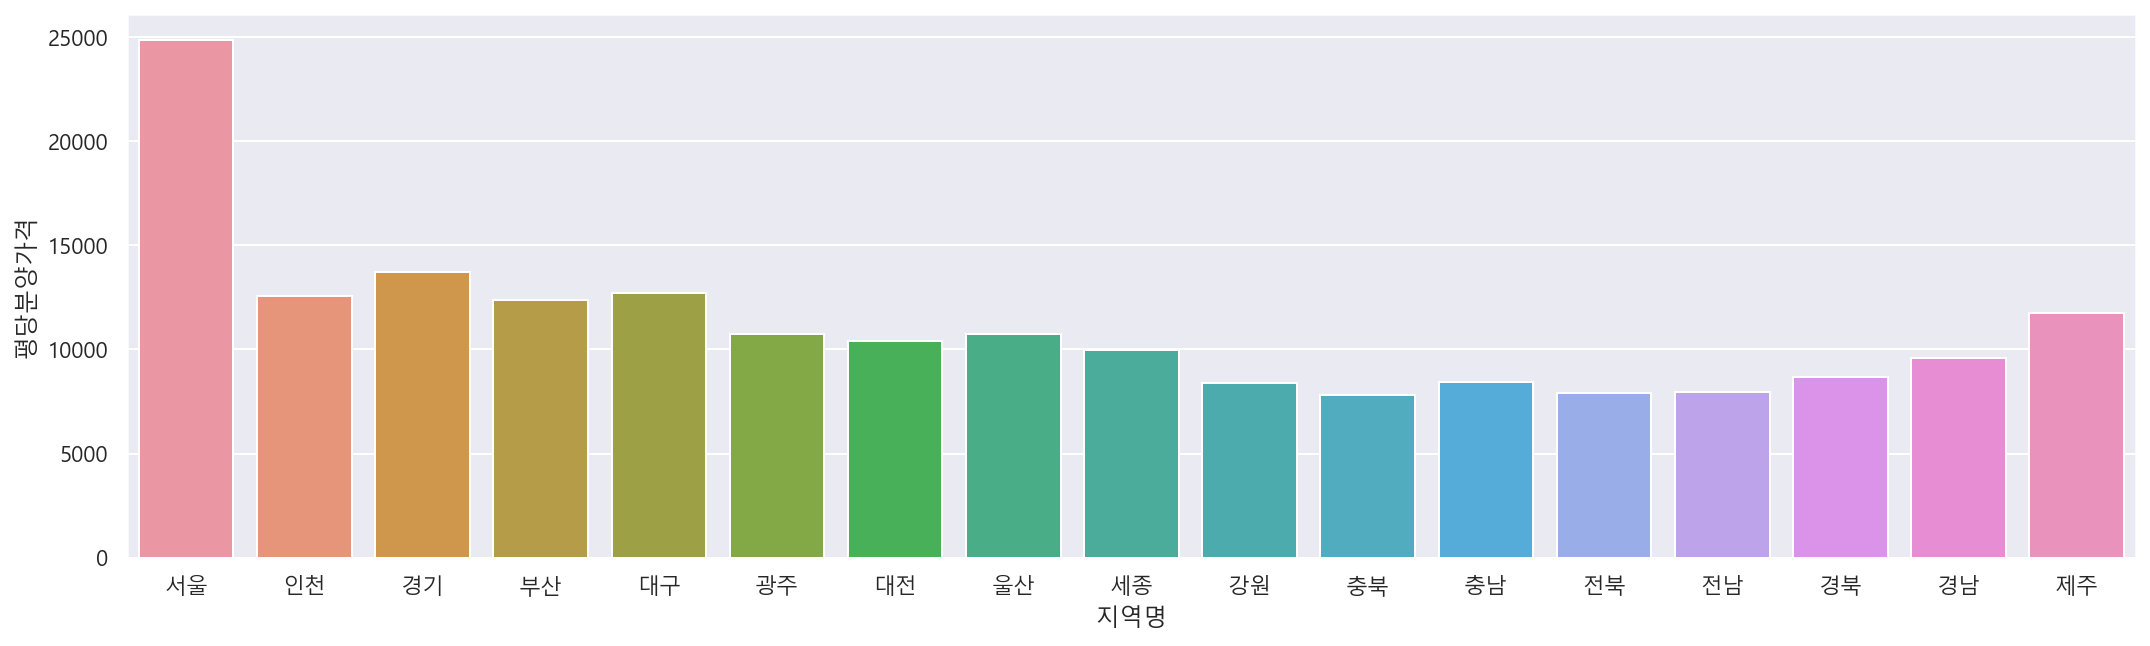

In [330]:
# 2. 지역별 평당분양가격 바 그래프
plt.figure(figsize=(18,5))
sns.barplot(x='지역명',y='평당분양가격',data=df_last,ci=None)
plt.show()

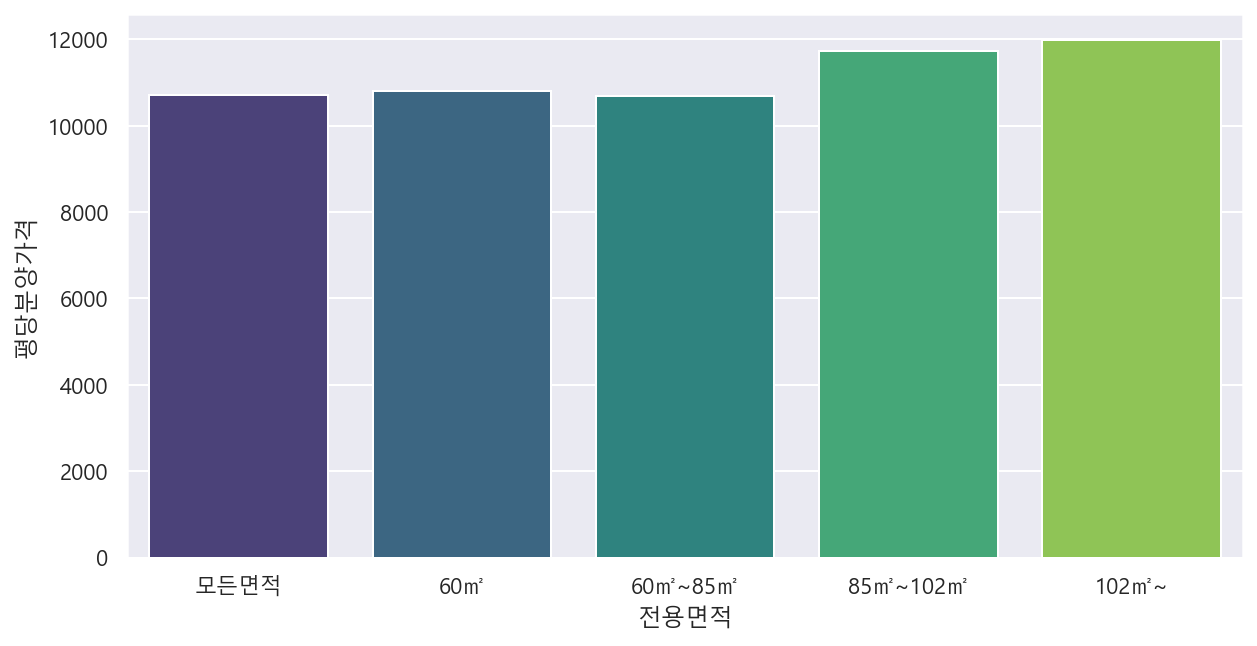

In [329]:
# 3. 전용면적당 평당분양가격
plt.figure(figsize=(10,5))
sns.barplot(x='전용면적',y='평당분양가격',data=df_last,ci=None,palette='viridis')
plt.show()

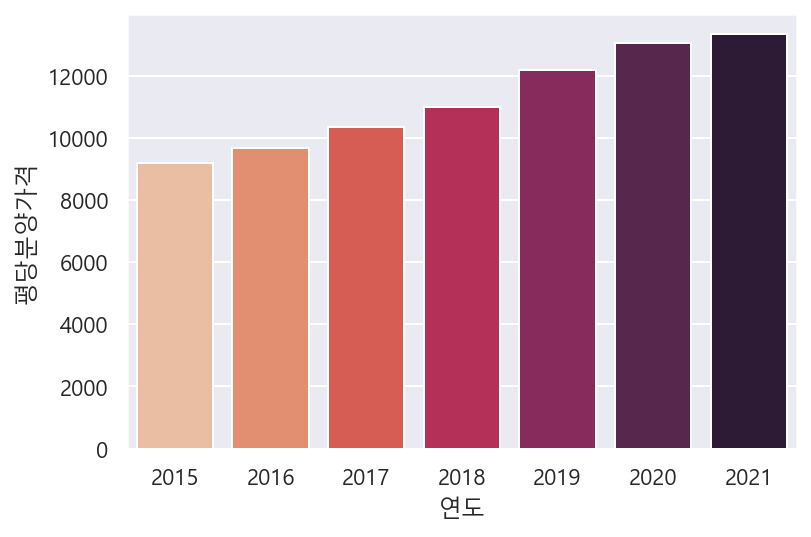

In [328]:
# 4.연도별 평당분양가격(bar)
sns.barplot(x='연도',y='평당분양가격',data=df_last,ci=None,palette='rocket_r')
plt.show()

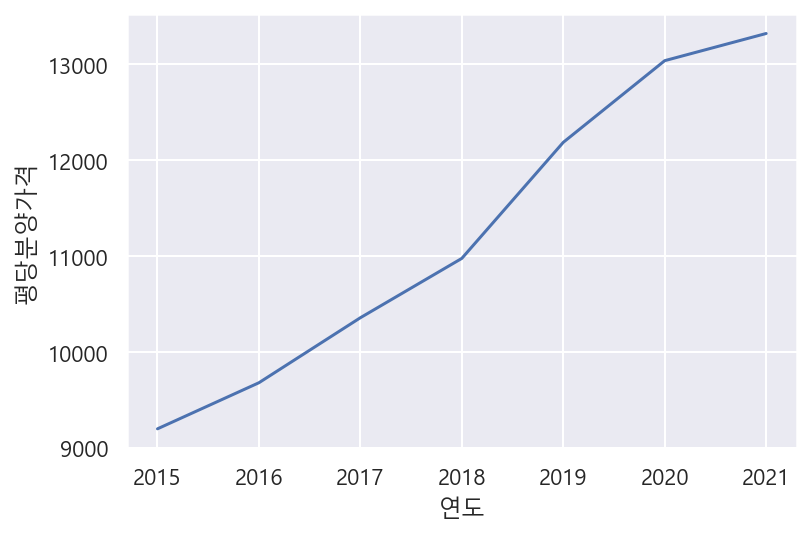

In [327]:
# 4.연도별 평당분양가격(line)
sns.lineplot(x='연도',y='평당분양가격',data=df_last)
plt.show()

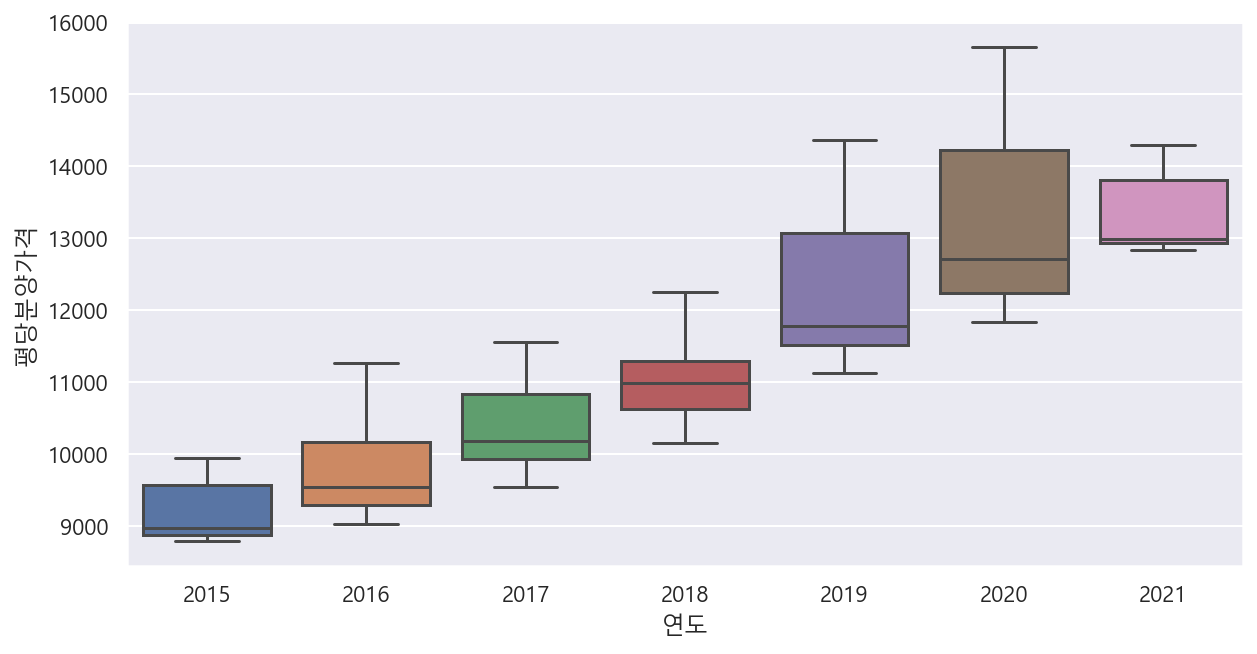

In [326]:
# 5. 연도별,전용면적별 box플롯
dff=df_last.pivot_table(index=['연도','월','전용면적'],values='평당분양가격')
dff=dff.reset_index(level=['연도'],col_level=1)
plt.figure(figsize=(10,5))
sns.boxplot(x='연도',y='평당분양가격',data=dff)
plt.show()

# 10. df_first와 df_last 합쳐서 분석

## 10.1 데이터 로드

In [348]:
# df_first 
df_first = pd.read_csv('data/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',encoding='CP949')
df_first

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,...,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,...,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,...,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


## 10.2 데이터 컨캣

In [371]:
#멜팅
df_first_melted = df_first.melt(id_vars='지역')
df_first_melted

,지역,variable,value
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [372]:
#구조변환
temp = df_first_melted['variable'].values
temp

array(['2013년12월', '2013년12월', '2013년12월', '2013년12월', '2013년12월',
       '2013년12월', '2013년12월', '2013년12월', '2013년12월', '2013년12월',
       '2013년12월', '2013년12월', '2013년12월', '2013년12월', '2013년12월',
       '2013년12월', '2013년12월', '2014년1월', '2014년1월', '2014년1월', '2014년1월',
       '2014년1월', '2014년1월', '2014년1월', '2014년1월', '2014년1월', '2014년1월',
       '2014년1월', '2014년1월', '2014년1월', '2014년1월', '2014년1월', '2014년1월',
       '2014년1월', '2014년2월', '2014년2월', '2014년2월', '2014년2월', '2014년2월',
       '2014년2월', '2014년2월', '2014년2월', '2014년2월', '2014년2월', '2014년2월',
       '2014년2월', '2014년2월', '2014년2월', '2014년2월', '2014년2월', '2014년2월',
       '2014년3월', '2014년3월', '2014년3월', '2014년3월', '2014년3월', '2014년3월',
       '2014년3월', '2014년3월', '2014년3월', '2014년3월', '2014년3월', '2014년3월',
       '2014년3월', '2014년3월', '2014년3월', '2014년3월', '2014년3월', '2014년4월',
       '2014년4월', '2014년4월', '2014년4월', '2014년4월', '2014년4월', '2014년4월',
       '2014년4월', '2014년4월', '2014년4월', '2014년4월', '2014년4월', '2014

In [373]:
# 연도 추출
year = []
for data in temp:
    year.append(data[0:4])
year

['2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2013',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 

In [374]:
year = np.array(year,dtype=np.int64)
year

array([2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
       2013, 2013, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 20

In [375]:
#연도 추가
df_first_melted['연도'] = year
df_first_melted

,지역,variable,value,연도
0,서울,2013년12월,18189,2013
1,부산,2013년12월,8111,2013
2,대구,2013년12월,8080,2013
3,인천,2013년12월,10204,2013
4,광주,2013년12월,6098,2013
...,...,...,...,...
352,전북,2015년8월,6580,2015
353,전남,2015년8월,6289,2015
354,경북,2015년8월,7037,2015
355,경남,2015년8월,7665,2015


In [376]:
#월 추출
month = []
for data in temp:
    month.append(data.split('월')[0].split('년')[1])
month

['12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',

In [377]:
month = np.array(month,dtype=np.int64)
month

array([12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        1,  1,  1,  1,  1

In [378]:
#월 추가
df_first_melted['월'] = month

In [379]:
df_first_melted

,지역,variable,value,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


In [380]:
# df_last와 컨캣하기 위해 데이터 프레임 가공
# 전용면적 추가
df_first_melted['전용면적'] = '모든면적'

In [381]:
# 컬럼순서 변경
df_first_melted =df_first_melted[['지역','연도','월','value','전용면적','variable']]

In [382]:
# 필요없는 컬럼 삭제
df_first_melted = df_first_melted.drop('variable',axis=1)

In [383]:
# 컬럼명 df_last와 동일하게 변경
df_first_melted.columns = ['지역명','연도','월','평당분양가격','전용면적']

In [384]:
df_first_melted

,지역명,연도,월,평당분양가격,전용면적
0,서울,2013,12,18189,모든면적
1,부산,2013,12,8111,모든면적
2,대구,2013,12,8080,모든면적
3,인천,2013,12,10204,모든면적
4,광주,2013,12,6098,모든면적
...,...,...,...,...,...
352,전북,2015,8,6580,모든면적
353,전남,2015,8,6289,모든면적
354,경북,2015,8,7037,모든면적
355,경남,2015,8,7665,모든면적


In [370]:
df_last

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
...,...,...,...,...,...
5435,제주,2021,1,17156.7,모든면적
5436,제주,2021,1,15463.8,60㎡
5437,제주,2021,1,17169.9,60㎡~85㎡
5438,제주,2021,1,NaN,85㎡~102㎡


In [385]:
#concat
total_df = pd.concat([df_first_melted,df_last])
total_df

,지역명,연도,월,평당분양가격,전용면적
0,서울,2013,12,18189.0,모든면적
1,부산,2013,12,8111.0,모든면적
2,대구,2013,12,8080.0,모든면적
3,인천,2013,12,10204.0,모든면적
4,광주,2013,12,6098.0,모든면적
...,...,...,...,...,...
5435,제주,2021,1,17156.7,모든면적
5436,제주,2021,1,15463.8,60㎡
5437,제주,2021,1,17169.9,60㎡~85㎡
5438,제주,2021,1,NaN,85㎡~102㎡


In [386]:
# 결측치 확인
total_df.isna().sum()

지역명         0
연도          0
월           0
평당분양가격    522
전용면적        0
dtype: int64

## 10.2 GroupBy vs Pivot_table

In [387]:
# 1.지역별 데이터 수 
# groupby
total_df.groupby('지역명').count()

,연도,월,평당분양가격,전용면적
지역명,,,,
강원,341,341,324,341
경기,341,341,336,341
경남,341,341,327,341
경북,341,341,315,341
광주,341,341,283,341
대구,341,341,328,341
대전,341,341,260,341
부산,341,341,336,341
서울,341,341,336,341


In [389]:
# 1.지역별 데이터 수 
# pivot_table
total_df.pivot_table(index='지역명',aggfunc='count')

,연도,월,전용면적,평당분양가격
지역명,,,,
강원,341,341,341,324
경기,341,341,341,336
경남,341,341,341,327
경북,341,341,341,315
광주,341,341,341,283
대구,341,341,341,328
대전,341,341,341,260
부산,341,341,341,336
서울,341,341,341,336


In [390]:
# 2.지역별 평당분양가격
# groupby
total_df.groupby('지역명')['평당분양가격'].mean()

지역명
강원     8266.129938
경기    13514.638690
경남     9428.119266
경북     8557.207937
광주    10525.662544
대구    12414.691463
대전    10233.190769
부산    12155.080655
서울    24501.371131
세종     9847.043060
울산    10529.023853
인천    12412.015964
전남     7826.208788
전북     7804.905389
제주    11443.231206
충남     8306.725078
충북     7715.887126
Name: 평당분양가격, dtype: float64

In [391]:
# 2.지역별 평당분양가격
# pivot_table
total_df.pivot_table(index='지역명',values='평당분양가격')

,평당분양가격
지역명,
강원,8266.129938
경기,13514.638690
경남,9428.119266
경북,8557.207937
광주,10525.662544
대구,12414.691463
대전,10233.190769
부산,12155.080655
서울,24501.371131


In [392]:
# 3. 전용면적별 평당분양가격
# groupby
total_df.groupby('전용면적')['평당분양가격'].mean()

전용면적
102㎡~       11987.947280
60㎡         10802.735170
60㎡~85㎡     10694.895726
85㎡~102㎡    11733.047719
모든면적        10132.424841
Name: 평당분양가격, dtype: float64

In [393]:
# 3. 전용면적별 평당분양가격
# pivot_table
total_df.pivot_table(index='전용면적',values='평당분양가격')

,평당분양가격
전용면적,
102㎡~,11987.947280
60㎡,10802.735170
60㎡~85㎡,10694.895726
85㎡~102㎡,11733.047719
모든면적,10132.424841


In [395]:
# 4. 지역별, 전용면적별 평당분양가격
# groupby
total_df.groupby(['지역명','전용면적'])['평당분양가격'].mean()

지역명  전용면적    
강원   102㎡~       9367.547619
     60㎡         8054.357143
     60㎡~85㎡     7854.523810
     85㎡~102㎡    8896.476471
     모든면적        7524.890476
                    ...     
충북   102㎡~       8383.466667
     60㎡         7294.152381
     60㎡~85㎡     7416.619048
     85㎡~102㎡    8481.757377
     모든면적        7199.786905
Name: 평당분양가격, Length: 85, dtype: float64

In [397]:
# 4. 지역별, 전용면적별 평당분양가격
# pivot_table
total_df.pivot_table(index=['지역명','전용면적'],values='평당분양가격')

평당분양가격
지역명 전용면적                 
강원  102㎡~     9367.547619
    60㎡       8054.357143
    60㎡~85㎡   7854.523810
    85㎡~102㎡  8896.476471
    모든면적      7524.890476
...                   ...
충북  102㎡~     8383.466667
    60㎡       7294.152381
    60㎡~85㎡   7416.619048
    85㎡~102㎡  8481.757377
    모든면적      7199.786905

[85 rows x 1 columns]

In [398]:
# 5. 연도, 지역별 평당분양가격
# groupby
total_df.groupby(['연도','지역명'])['평당분양가격'].mean()

연도    지역명
2013  강원      6230.00
      경기     10855.00
      경남      6473.00
      경북      6168.00
      광주      6098.00
               ...   
2021  전남      9680.22
      전북      8457.24
      제주     16596.80
      충남      9216.90
      충북      8766.78
Name: 평당분양가격, Length: 153, dtype: float64

In [399]:
# 5. 연도, 지역별 평당분양가격
# pivot_table
total_df.pivot_table(index=['연도','지역명'],values='평당분양가격')

평당분양가격
연도   지역명          
2013 강원    6230.00
     경기   10855.00
     경남    6473.00
     경북    6168.00
     광주    6098.00
...            ...
2021 전남    9680.22
     전북    8457.24
     제주   16596.80
     충남    9216.90
     충북    8766.78

[153 rows x 1 columns]

## 10.3 선그래프와 막대 그래프로 시각화(matplotlib)

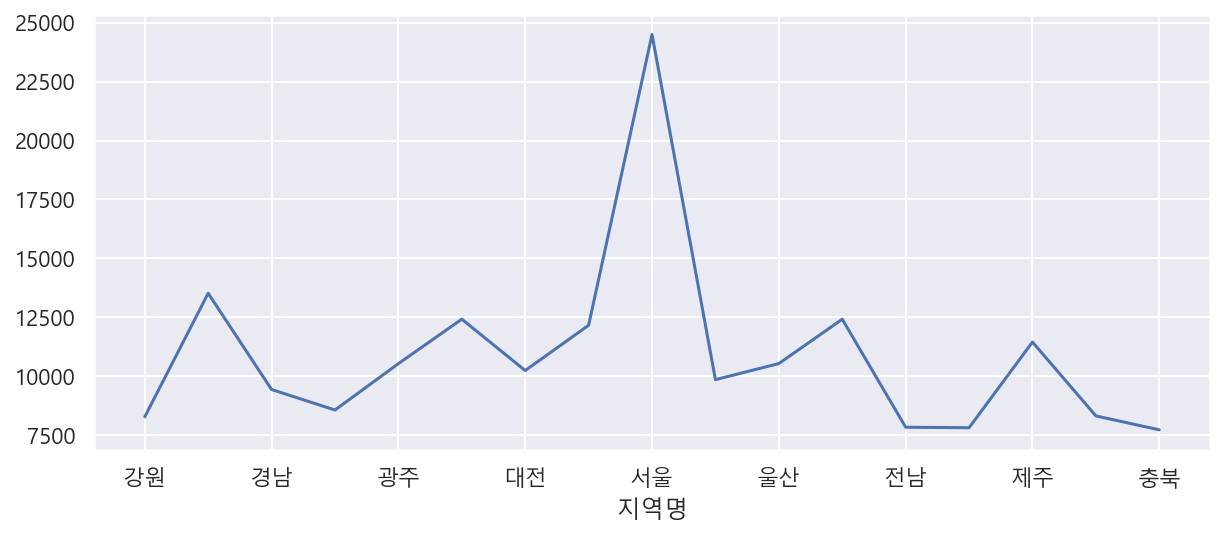

In [401]:
# 지역별 평당분양가격 선 그래프
total_df.groupby('지역명')['평당분양가격'].mean().plot(figsize=(10,4))
plt.show()

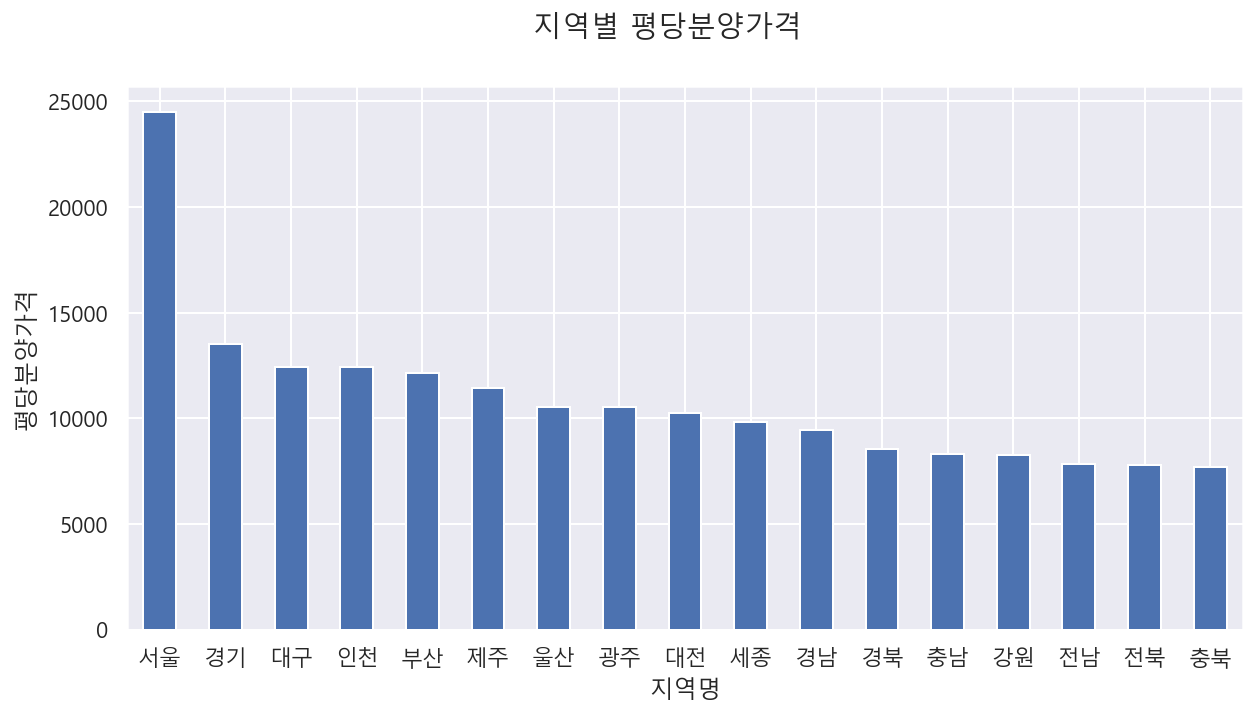

In [444]:
# 지역별 평당분양가격 막대 그래프
sort_total = total_df.pivot_table(index='지역명',values='평당분양가격').sort_values(by='평당분양가격',ascending=False)
sort_total.plot.bar(figsize=(10,5),ylabel='평당분양가격')
plt.suptitle('지역별 평당분양가격')
plt.gca().get_legend().remove()
plt.xticks(rotation=0)
plt.show()

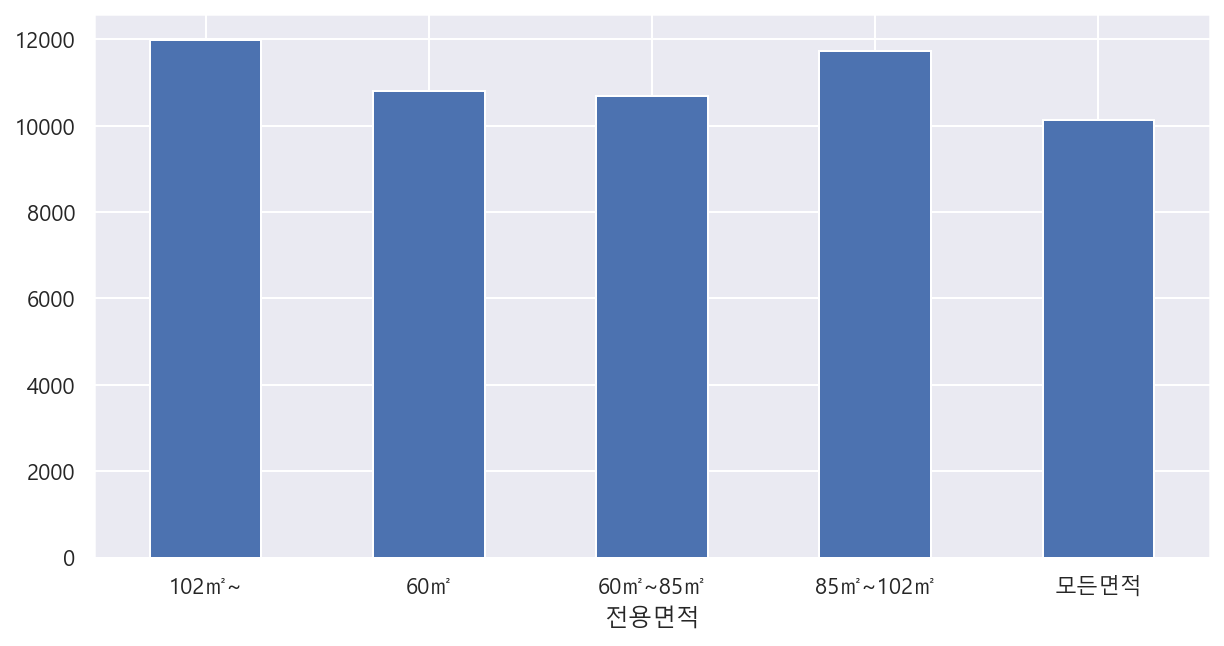

In [432]:
# 전용면적당 평당분양가격 bar 그래프
total_df.groupby(total_df.전용면적)['평당분양가격'].mean().plot.bar(figsize=(10,5))
plt.xticks(rotation=0)
plt.show()

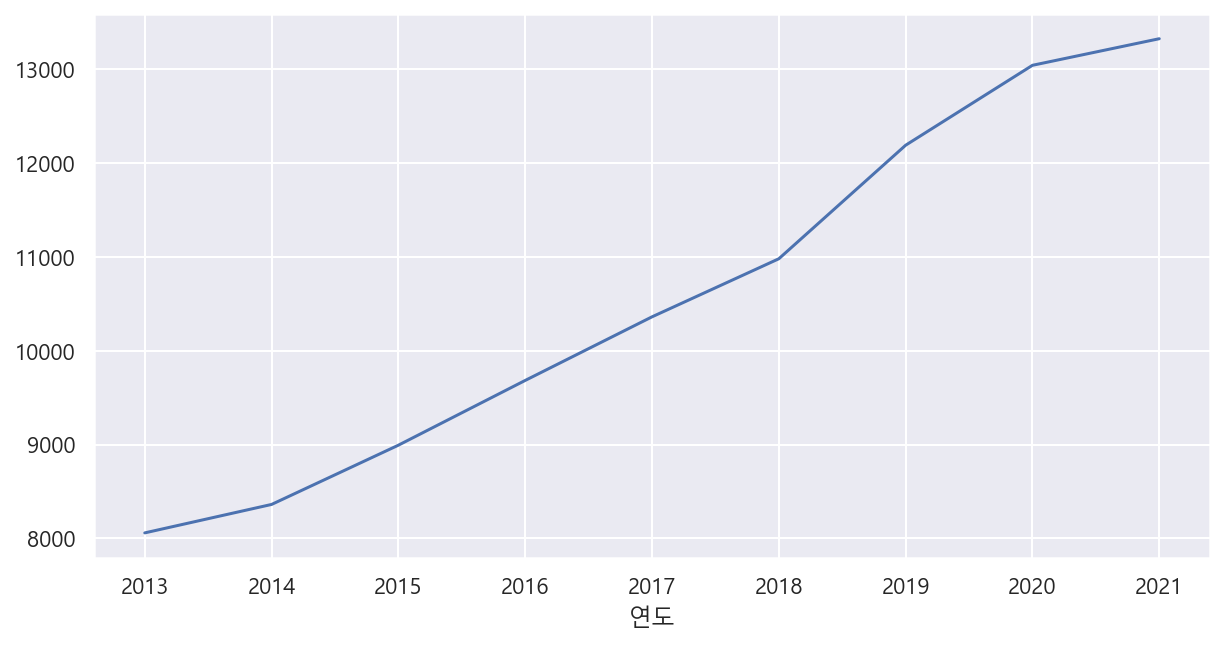

In [446]:
#연도별 평당분양가격 선 그래프
total_df.groupby('연도')['평당분양가격'].mean().plot(figsize=(10,5))
plt.show()

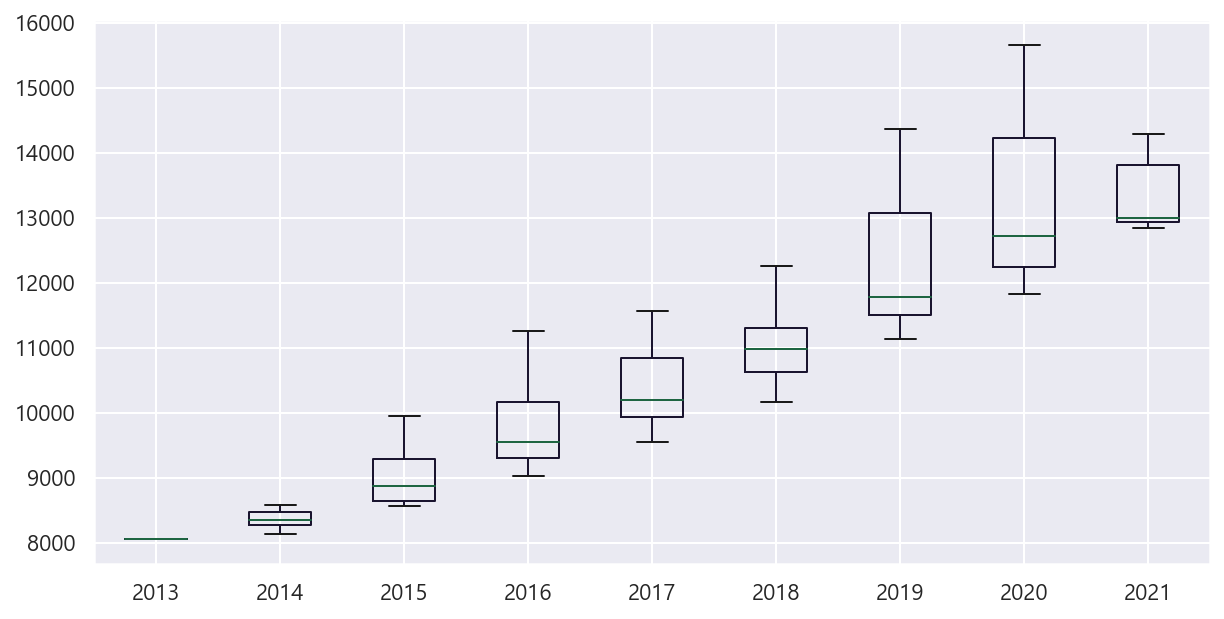

In [519]:
#연도별(월별),전용면적별 box플롯
total_df.pivot_table(index=['전용면적','월'],columns='연도',values='평당분양가격').plot(figsize=(10,5),kind='box')
plt.show()

## 10.4 선그래프와 막대 그래프로 시각화(seaborn)

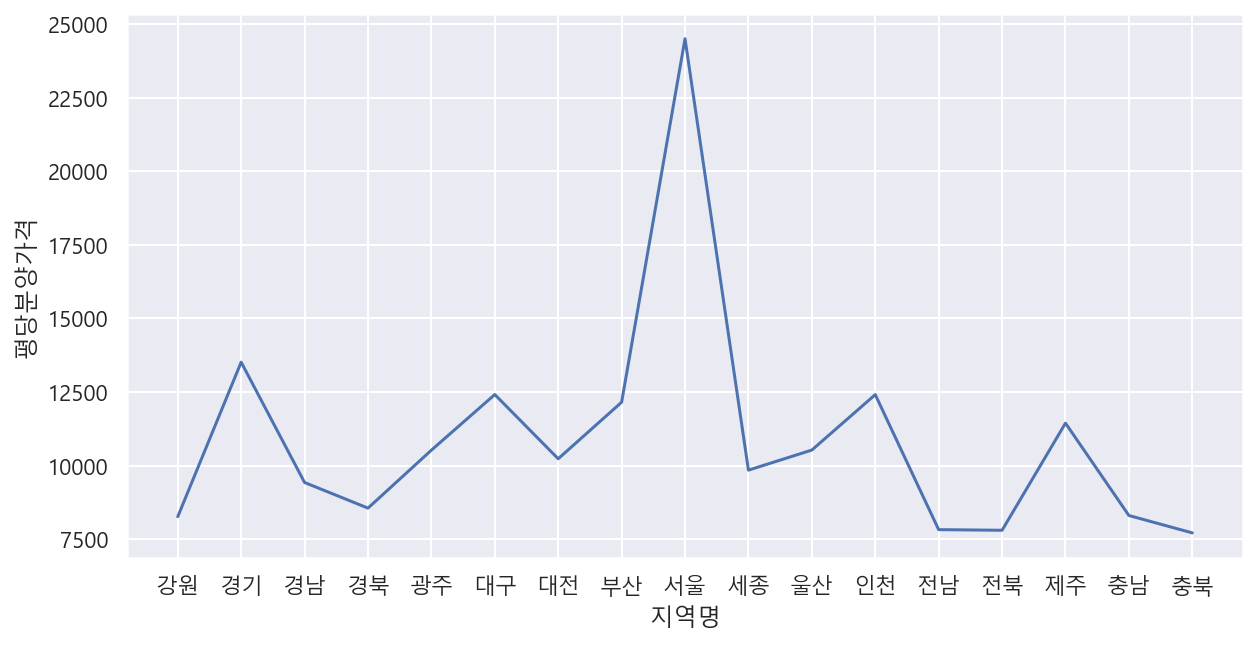

In [479]:
# 지역별 평당분양가격 선 그래프
tdf1=total_df.pivot_table(index='지역명',values='평당분양가격')
plt.figure(figsize=(10,5))
sns.lineplot(data=tdf1,x='지역명',y='평당분양가격')
plt.show()

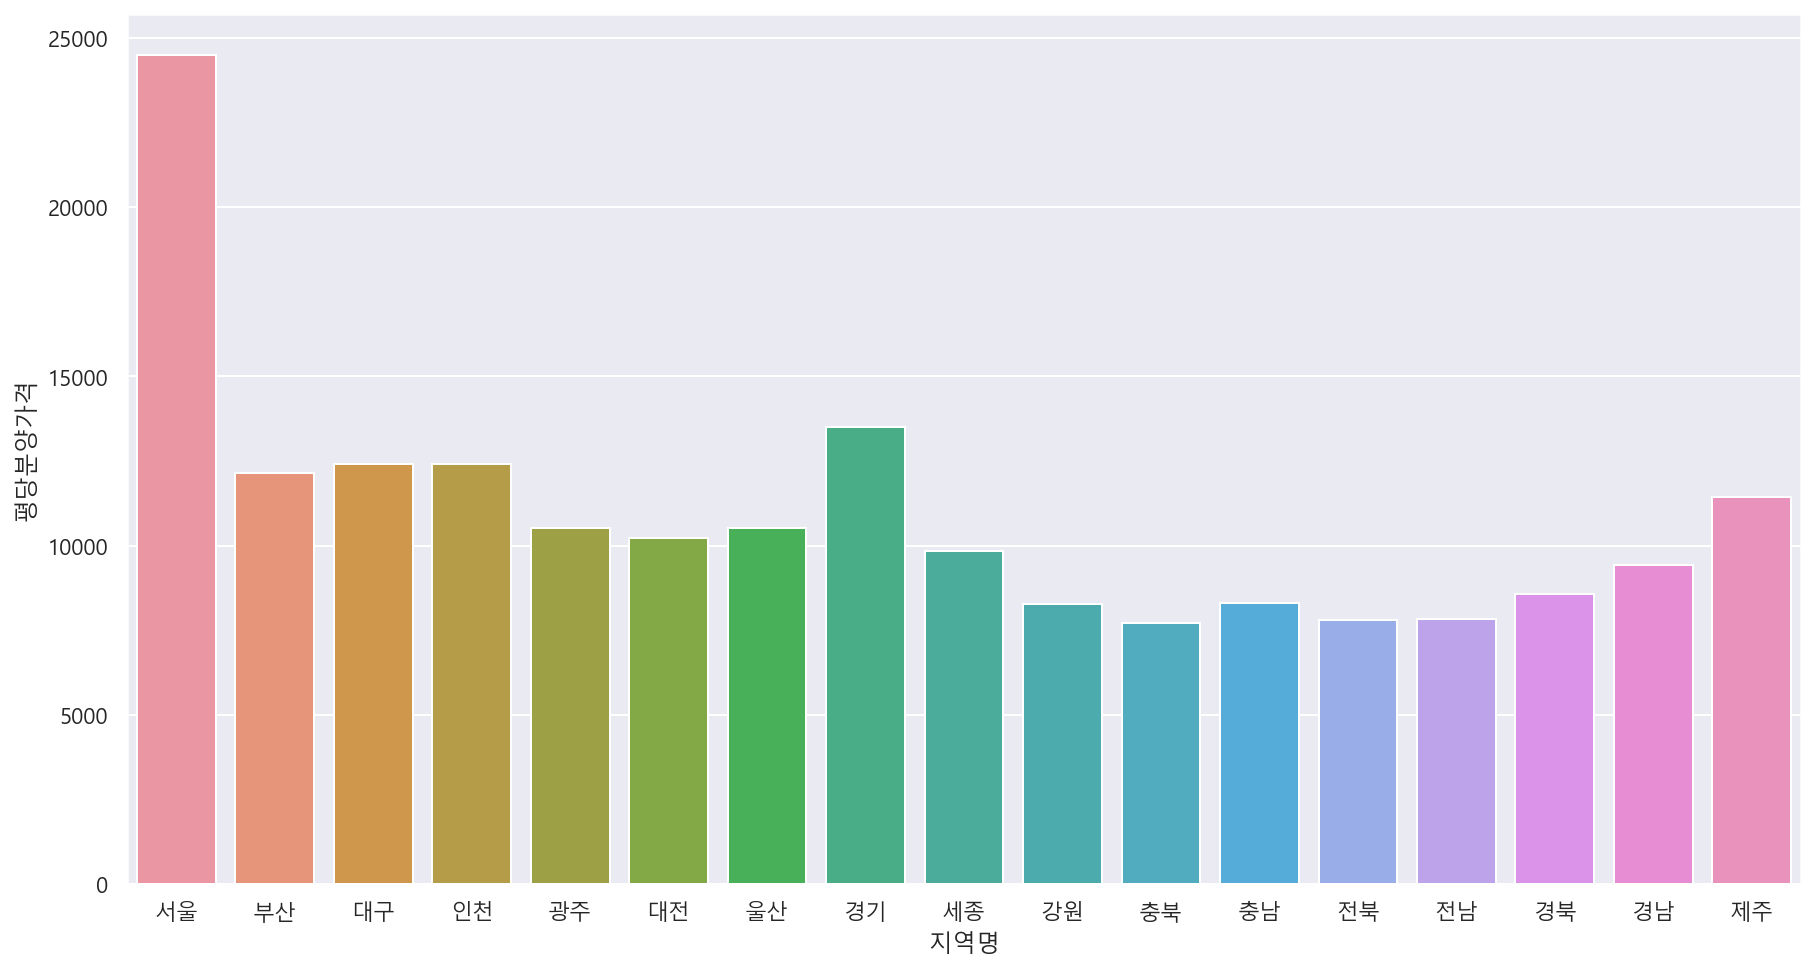

In [485]:
# 지역별 평당분양가격 막대 그래프
plt.figure(figsize=(15,8))
sns.barplot(data=total_df,x='지역명',y='평당분양가격',ci=None)
plt.show()

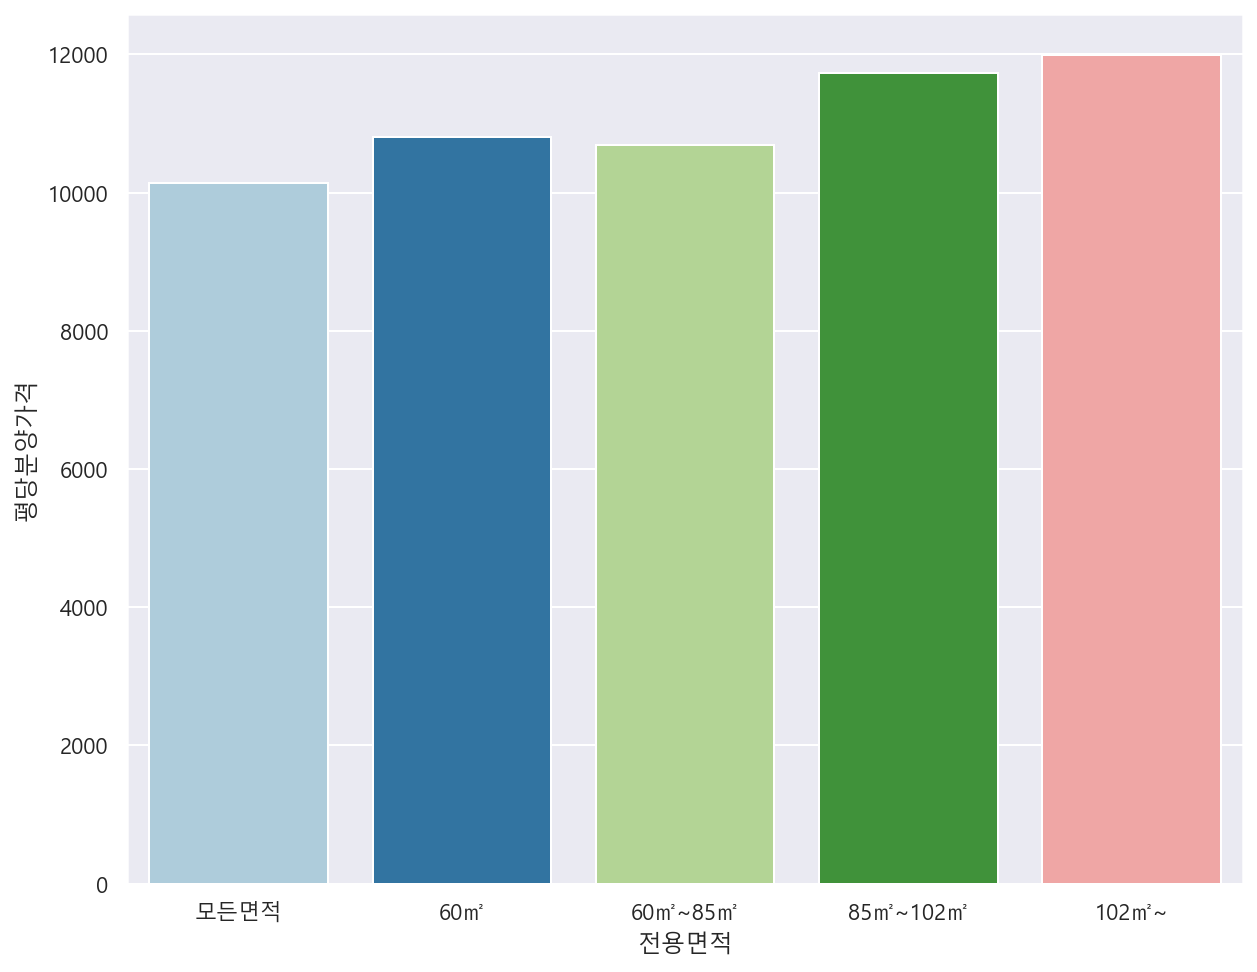

In [499]:
# 전용면적당 평당분양가격 bar 그래프
plt.figure(figsize=(10,8))
sns.set_palette('Paired',5)
sns.barplot(data=total_df,x='전용면적',y='평당분양가격',ci=None)
plt.show()

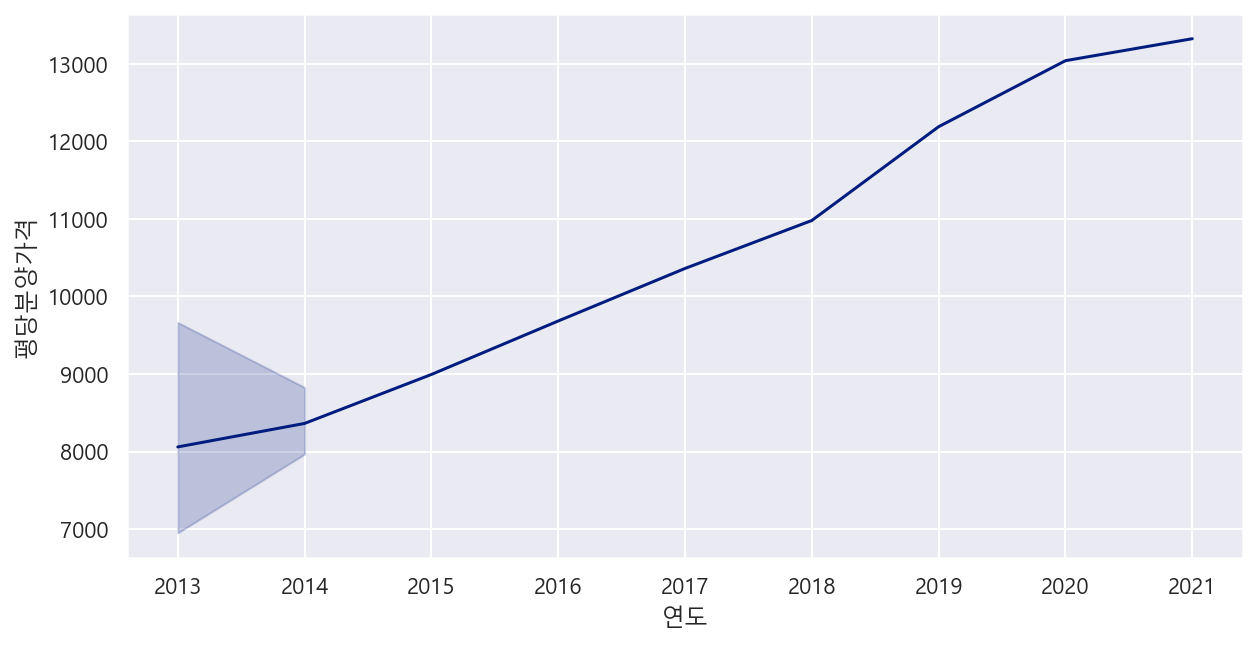

In [502]:
#연도별 평당분양가격 선 그래프
plt.figure(figsize=(10,5))
sns.set_palette('dark')
sns.lineplot(x='연도',y='평당분양가격',data=total_df)
plt.show()

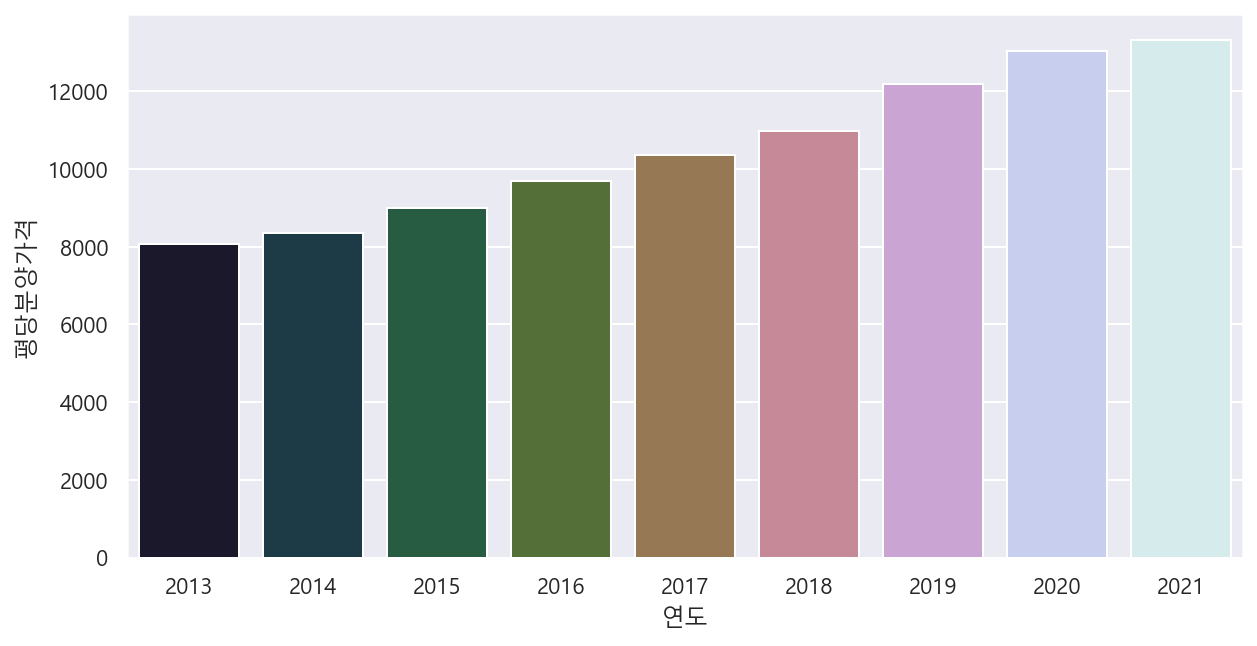

In [508]:
#연도별 평당분양가격 바 그래프
plt.figure(figsize=(10,5))
sns.set_palette('cubehelix',9)
sns.barplot(x='연도',y='평당분양가격',data=total_df,ci=None)
plt.show()

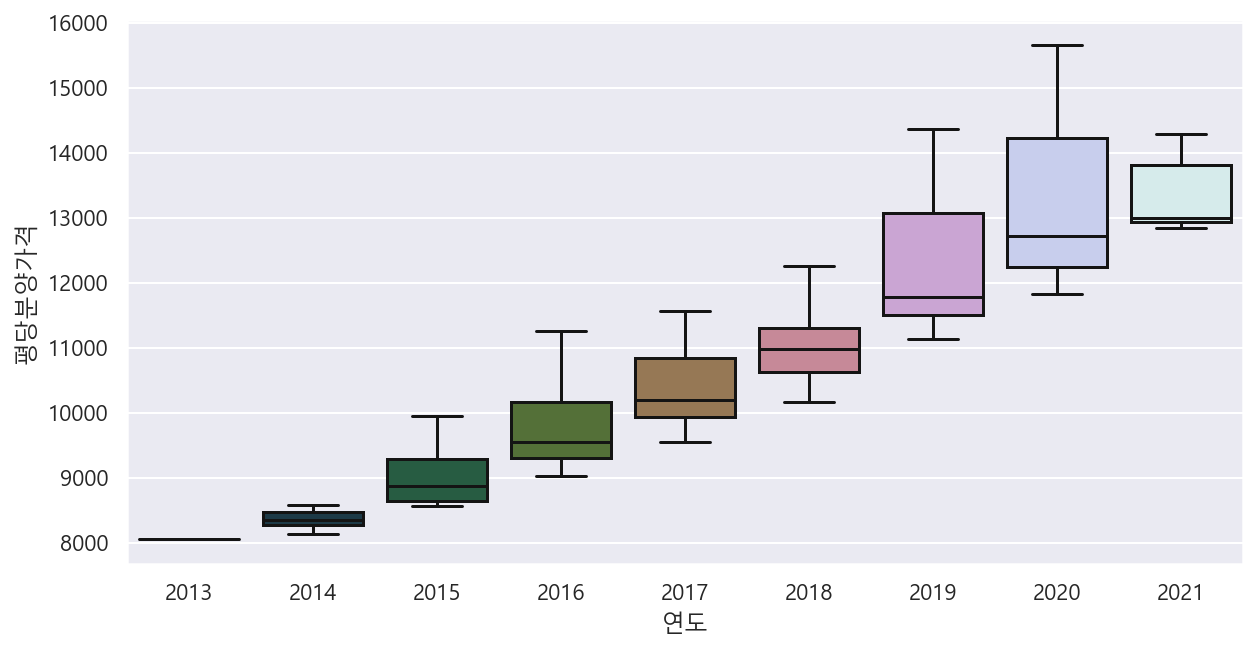

In [518]:
#연도별(월별),전용면적별 box플롯
tdp=total_df.pivot_table(index=['연도','전용면적','월'],values='평당분양가격')
tdp = tdp.reset_index(level=['연도'],col_level=1)
tdp
plt.figure(figsize=(10,5))
sns.set_palette('cubehelix',9)
sns.boxplot(x='연도',y='평당분양가격',data=tdp)
plt.show()